#### [파이썬을 활용한 금융분석(Python for Python) / 이브 힐피시 지음 / 한빛미디어] 교재 5장을 기초로 작성하였습니다. 
                      

## DataFrame 클래스 다루기



In [21]:
## DataFrame 클래스는 SQL 데이터베이스나 스프레드시트처럼 레이블이 있는 데이터를 다루도록 설계됨 

import pandas as pd                               # pandas 불러오기
df = pd.DataFrame([10, 20, 30, 40],               # 리스트로 데이터 정의하기 
                  columns=['numbers'],             # 열 레이블 지정하기 
                  index=['a', 'b', 'c', 'd'])     # 인덱스 레이블 지정하기 
df                                                # DataFrame 데이터를 열 레이블 및 인덱스 레이블과 함께 나타내기 
                

,numbers
a,10
b,20
c,30
d,40


In [22]:
## DataFrame 객체로 작업하는 것은 일반적인 ndarray 객체를 다루는 것보다 편리하고 효율적, 계산 면에서도 ndarray보다 효율적임 

df.index        #인덱스 속성과 인덱스 객체 

Index(['a', 'b', 'c', 'd'], dtype='object')

In [23]:
df.columns      #열 속성과 인덱스 객체 

Index(['numbers'], dtype='object')

In [24]:
df.loc['c']     # 인덱스 c에 해당하는 값을 선택

numbers    30
Name: c, dtype: int64

In [25]:
df.loc[['a', 'd']] 

,numbers
a,10
d,40


In [26]:
df.iloc[1:3]

,numbers
b,20
c,30


In [27]:
df.sum()

numbers    100
dtype: int64

In [28]:
df.apply(lambda x:x**2)  # apply() 메서드로 제곱값 벡터를 계산한다. 

,numbers
a,100
b,400
c,900
d,1600


In [29]:
df**2  #ndarray처럼 직접 벡터와 계산한다.

,numbers
a,100
b,400
c,900
d,1600


In [30]:
## Numpy ndarray와 달리 DataFrame은 양방향으로 크기를 증가시킬 수 있다. 


df['floats'] = (1.5, 2.5, 3.5, 4.5)   #튜플로 새로운 칼럼 추가 

df


,numbers,floats
a,10,1.5
b,20,2.5
c,30,3.5
d,40,4.5


In [31]:
df['floats']

a    1.5
b    2.5
c    3.5
d    4.5
Name: floats, dtype: float64

In [32]:
#DataFrame 객체를 사용해서 새로운 열을 정의할 수 있음 

df['names'] = pd.DataFrame(['cho', 'kim', 'jang', 'koo'],
                            index=['d', 'a', 'b', 'c'])
df    

,numbers,floats,names
a,10,1.5,kim
b,20,2.5,jang
c,30,3.5,koo
d,40,4.5,cho


In [35]:
# 데이터 추가

df.append({'numbers' : 100, 'floats': 5.75, 'names': 'lee'},
          ignore_index = True)   #   ignore_index = True를 사용하면 이전 데이터에 있던 인덱스를 그대로 가져온다. 

,numbers,floats,names
0,10,1.50,kim
1,20,2.50,jang
2,30,3.50,koo
3,40,4.50,cho
4,100,5.75,lee


In [36]:
df[['numbers','floats']].mean()  # 지정한 두 열의 평균을 계산 


numbers    25.0
floats      3.0
dtype: float64

In [37]:
df[['numbers','floats']].std()  # 지정한 두 열의 표준편차를 계산 

numbers    12.909944
floats      1.290994
dtype: float64

#### 시계열 데이터를 다루기 위해 DatetimeIndex 등의 기능 활용

In [39]:
# 표준정규분포 값이 있는 ndarray 기반 예제 

import numpy as np
np.random.seed(100)
a = np.random.standard_normal((9,4))
a

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

In [40]:
# ndarray객체에 인덱스, 칼럼 메타 정보 더하기 

df = pd.DataFrame(a)   #ndarray 객체에서 DataFrame 객체를 생성한다. 
df

,0,1,2,3
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


In [41]:
df.columns = ['No1', 'No2', 'No3', 'No4']  # 열 레이블을 리스트로 정의하여 칼럼 교체, 칼럼을 정의하고 선택하기에 용이해짐 
df      

,No1,No2,No3,No4
0,-1.749765,0.342680,1.153036,-0.252436
1,0.981321,0.514219,0.221180,-1.070043
2,-0.189496,0.255001,-0.458027,0.435163
3,-0.583595,0.816847,0.672721,-0.104411
4,-0.531280,1.029733,-0.438136,-1.118318
5,1.618982,1.541605,-0.251879,-0.842436
6,0.184519,0.937082,0.731000,1.361556
7,-0.326238,0.055676,0.222400,-1.443217
8,-0.756352,0.816454,0.750445,-0.455947


In [43]:
#DatetimeIndex 객체 생성하기 

dates = pd.date_range('2021-1-1', periods=9, freq='M')      #DatetimeIndex 객체를 생성
dates

DatetimeIndex(['2021-01-31', '2021-02-28', '2021-03-31', '2021-04-30',
               '2021-05-31', '2021-06-30', '2021-07-31', '2021-08-31',
               '2021-09-30'],
              dtype='datetime64[ns]', freq='M')

In [44]:
#DatetimeIndex 객체에 인덱스를 붙여 시계열 데이터로 만들기

df.index = dates
df

,No1,No2,No3,No4
2021-01-31,-1.749765,0.342680,1.153036,-0.252436
2021-02-28,0.981321,0.514219,0.221180,-1.070043
2021-03-31,-0.189496,0.255001,-0.458027,0.435163
2021-04-30,-0.583595,0.816847,0.672721,-0.104411
2021-05-31,-0.531280,1.029733,-0.438136,-1.118318
2021-06-30,1.618982,1.541605,-0.251879,-0.842436
2021-07-31,0.184519,0.937082,0.731000,1.361556
2021-08-31,-0.326238,0.055676,0.222400,-1.443217
2021-09-30,-0.756352,0.816454,0.750445,-0.455947


In [47]:
# ndarray 객체로 DataFrame 객체를 만들 수 있다. 
# 반대로 DataFrame 클래스의 Values 속성이나 NumPy의 np.array() 함수를 사용하면 ndarray 객체를 얻을 수 있다.

df.values  #ndarray 형태의 원 데이터로 접근 

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

In [46]:
np.array(df)

array([[-1.74976547,  0.3426804 ,  1.1530358 , -0.25243604],
       [ 0.98132079,  0.51421884,  0.22117967, -1.07004333],
       [-0.18949583,  0.25500144, -0.45802699,  0.43516349],
       [-0.58359505,  0.81684707,  0.67272081, -0.10441114],
       [-0.53128038,  1.02973269, -0.43813562, -1.11831825],
       [ 1.61898166,  1.54160517, -0.25187914, -0.84243574],
       [ 0.18451869,  0.9370822 ,  0.73100034,  1.36155613],
       [-0.32623806,  0.05567601,  0.22239961, -1.443217  ],
       [-0.75635231,  0.81645401,  0.75044476, -0.45594693]])

#### Pandas DataFrame 클래스 내장 함수 메서드

In [49]:
df.info()  ## 데이터, 컬럼, 인덱스에 대한 메타 정보를 제공 

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9 entries, 2021-01-31 to 2021-09-30
Freq: M
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   No1     9 non-null      float64
 1   No2     9 non-null      float64
 2   No3     9 non-null      float64
 3   No4     9 non-null      float64
dtypes: float64(4)
memory usage: 360.0 bytes


In [50]:
df.describe()   # 각 칼럼에 대한 유용한 통계를 제공 

,No1,No2,No3,No4
count,9.000000,9.000000,9.000000,9.000000
mean,-0.150212,0.701033,0.289193,-0.387788
std,0.988306,0.457685,0.579920,0.877532
min,-1.749765,0.055676,-0.458027,-1.443217
25%,-0.583595,0.342680,-0.251879,-1.070043
50%,-0.326238,0.816454,0.222400,-0.455947
75%,0.184519,0.937082,0.731000,-0.104411
max,1.618982,1.541605,1.153036,1.361556


In [51]:
df.sum()    # 컬럼 합계

No1   -1.351906
No2    6.309298
No3    2.602739
No4   -3.490089
dtype: float64

In [52]:
df.mean()   # 컬럼 평균

No1   -0.150212
No2    0.701033
No3    0.289193
No4   -0.387788
dtype: float64

## 시계열 데이터 시각화하기 

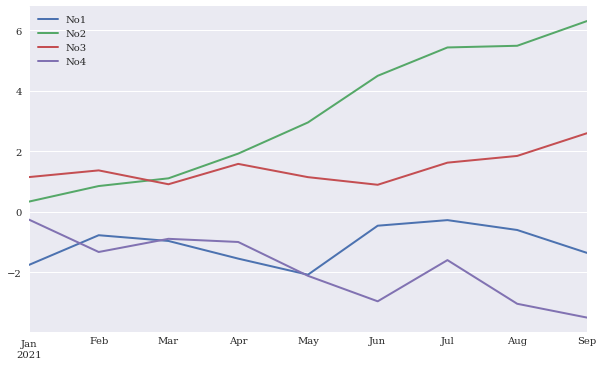

In [61]:
from pylab import plt, mpl    
plt.style.use('seaborn')               # 플롯 스타일 설정 
mpl.rcParams['font.family'] = 'serif'  # 플롯 스타일 설정 
%matplotlib inline

df.cumsum().plot(lw=2.0, figsize=(10, 6)); # 플네 개 컬럼의 누적합계를 라인 플롯으로 시각화 

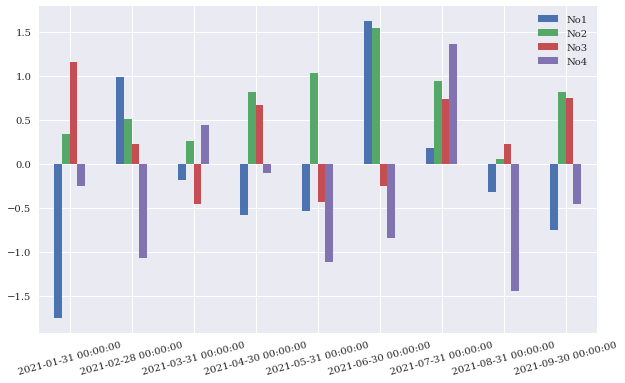

In [62]:
df.plot.bar(figsize=(10,6), rot=15);     #plot.bar()함수로 바 플롯을 표시 
# df.plot(kind='bar', figsize=(10,6))    #kind 매개변수로 플롯 유형을 변경 

## GroupBy 연산

#### pandas는 강력하고 유연한 그룹화 기능을 가지고 있음. SQL의 그룹화, 엑셀 피벗테이블 기능과 유사

In [63]:
df['Quarter'] = [ 'Q1', 'Q1', 'Q1', 'Q2', 'Q2',
                  'Q2', 'Q3', 'Q3',  'Q3']
df

,No1,No2,No3,No4,Quarter
2021-01-31,-1.749765,0.342680,1.153036,-0.252436,Q1
2021-02-28,0.981321,0.514219,0.221180,-1.070043,Q1
2021-03-31,-0.189496,0.255001,-0.458027,0.435163,Q1
2021-04-30,-0.583595,0.816847,0.672721,-0.104411,Q2
2021-05-31,-0.531280,1.029733,-0.438136,-1.118318,Q2
2021-06-30,1.618982,1.541605,-0.251879,-0.842436,Q2
2021-07-31,0.184519,0.937082,0.731000,1.361556,Q3
2021-08-31,-0.326238,0.055676,0.222400,-1.443217,Q3
2021-09-30,-0.756352,0.816454,0.750445,-0.455947,Q3


In [66]:
groups = df.groupby('Quarter')   #분기 열을 기준으로 그룹화

groups.size()     # 각 그룹의 데이터 수를 출력

Quarter
Q1    3
Q2    3
Q3    3
dtype: int64

In [67]:
groups.mean()  # 각 그룹의 평균 출력

,No1,No2,No3,No4
Quarter,,,,
Q1,-0.319314,0.370634,0.305396,-0.295772
Q2,0.168035,1.129395,-0.005765,-0.688388
Q3,-0.299357,0.603071,0.567948,-0.179203


In [68]:
groups.max() # 각 그룹의 최댓값 출력

,No1,No2,No3,No4
Quarter,,,,
Q1,0.981321,0.514219,1.153036,0.435163
Q2,1.618982,1.541605,0.672721,-0.104411
Q3,0.184519,0.937082,0.750445,1.361556


In [69]:
groups.aggregate([min, max]).round(2)   # 각 그룹의 최솟값과 최댓값을 같이 출력 

No1         No2         No3         No4      
          min   max   min   max   min   max   min   max
Quarter                                                
Q1      -1.75  0.98  0.26  0.51 -0.46  1.15 -1.07  0.44
Q2      -0.58  1.62  0.82  1.54 -0.44  0.67 -1.12 -0.10
Q3      -0.76  0.18  0.06  0.94  0.22  0.75 -1.44  1.36

In [70]:
df['Odd_Even'] = [ 'Odd', 'Even', 'Odd', 'Even', 'Odd', 'Even',
                   'Odd', 'Even', 'Odd']

groups = df.groupby(['Quarter', 'Odd_Even'])

groups.size()

Quarter  Odd_Even
Q1       Even        1
         Odd         2
Q2       Even        2
         Odd         1
Q3       Even        1
         Odd         2
dtype: int64

In [72]:
groups[['No1','No4']].aggregate([sum, np.mean])

No1                 No4          
                       sum      mean       sum      mean
Quarter Odd_Even                                        
Q1      Even      0.981321  0.981321 -1.070043 -1.070043
        Odd      -1.939261 -0.969631  0.182727  0.091364
Q2      Even      1.035387  0.517693 -0.946847 -0.473423
        Odd      -0.531280 -0.531280 -1.118318 -1.118318
Q3      Even     -0.326238 -0.326238 -1.443217 -1.443217
        Odd      -0.571834 -0.285917  0.905609  0.452805

## 고급 선택법

#### 열 값에 조건을 정하거나 이러한 조건들을 논리적으로 결합하여 데이터를 선택

In [75]:
data = np.random.standard_normal((10, 2))      #표준정규분포 난수로 구성된 ndarray 객체 
df = pd.DataFrame(data, columns=['x', 'y'])    # 동일한 난수로 구성된 DataFrame 객체 

df.info()      # 동일한 난수로 구성된 DataFrame 객체 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x       10 non-null     float64
 1   y       10 non-null     float64
dtypes: float64(2)
memory usage: 288.0 bytes


In [76]:
df.head()  # head() 메서드로 처음 다섯 줄을 출력

,x,y
0,0.750453,-1.306992
1,0.580573,-1.104523
2,0.690121,0.686890
3,-1.566688,0.904974
4,0.778822,0.428233


In [77]:
df.tail()  #tail() 메서드로 마지막 다섯 줄을 출력

,x,y
5,0.108872,0.028284
6,-0.578826,-1.199451
7,-1.705952,0.369164
8,1.876573,-0.376903
9,1.831936,0.003017


In [78]:
# 비교 연산
df['x'] > 0.5  # x칼럼의 값이 0.5보다 큰지를 확인 

0     True
1     True
2     True
3    False
4     True
5    False
6    False
7    False
8     True
9     True
Name: x, dtype: bool

In [79]:
(df['x'] > 0) & (df['y'] < 0)   # x칼럼의 값이 양수이고, y열의 값이 음수인지 확인 

0     True
1     True
2    False
3    False
4    False
5    False
6    False
7    False
8     True
9    False
dtype: bool

In [80]:
(df['x']>0) | (df['y'] < 0)    # x칼럼의 값이 양수이거나, y열의 값이 음수인지 확인 

0     True
1     True
2     True
3    False
4     True
5     True
6     True
7    False
8     True
9     True
dtype: bool

In [81]:
df > 0   # DataFrame 객체의 어떤 값이 양수인지 확인 

,x,y
0,True,False
1,True,False
2,True,True
3,False,True
4,True,True
5,True,True
6,False,False
7,False,True
8,True,False
9,True,True


In [82]:
df[df > 0]    #양수값을 모두 선택하고 다른 값은 NaN으로 대체 

,x,y
0,0.750453,NaN
1,0.580573,NaN
2,0.690121,0.686890
3,NaN,0.904974
4,0.778822,0.428233
5,0.108872,0.028284
6,NaN,NaN
7,NaN,0.369164
8,1.876573,NaN
9,1.831936,0.003017


## 병합, 조인, 머지

In [84]:
df1 = pd.DataFrame(['100', '200', '300', '400'],
                  index=['a', 'b', 'c', 'd'],
                  columns=['A',])
df1

,A
a,100
b,200
c,300
d,400


In [86]:
df2 = pd.DataFrame(['200', '150', '50'],
                  index=['f', 'b', 'd'],
                  columns=['B',])
df2

,B
f,200
b,150
d,50


## 병합 

#### 병합은 하나의 DataFrame의 행과 다른 DataFrame의 행을 합치는 것. append() 메서드, pd.concat()함수를 사용

In [87]:
df1.append(df2, sort=False)   #df2에 df1을 새 행으로 추가

,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


In [89]:
df1.append(df2, ignore_index=True, sort=False)     #인덱스를 무시하고 같은 연산을 수행 

,A,B
0,100,NaN
1,200,NaN
2,300,NaN
3,400,NaN
4,NaN,200
5,NaN,150
6,NaN,50


In [90]:
pd.concat((df1, df2), sort=False)   


,A,B
a,100,NaN
b,200,NaN
c,300,NaN
d,400,NaN
f,NaN,200
b,NaN,150
d,NaN,50


In [91]:
pd.concat((df1, df2), ignore_index=True, sort=False)


,A,B
0,100,NaN
1,200,NaN
2,300,NaN
3,400,NaN
4,NaN,200
5,NaN,150
6,NaN,50


#### 조인

#### 두 데이터를 조인할 때는 DataFrame 객체의 순서가 영향을 미친다. 디폴트 값으로 첫 번째 DataFrame 객체의 인덱스가 사용된다. 좌측 조인

In [92]:
df1.join(df2)  #df1의 인덱스가 영향을 미친다. 

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [94]:
df2.join(df1)   #df2의 인덱스가 영향을 미친다. 

,B,A
f,200,NaN
b,150,200
d,50,400


In [95]:
## 네 가지의 인덱스 방법이 있으며 각 방법마다 인덱스가 데이터에 미치는 영향이 다르다 

df1.join(df2, how='left')  #좌측 조인 

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50


In [96]:
df1.join(df2, how='right')  #우측 조인 

,A,B
f,NaN,200
b,200,150
d,400,50


In [97]:
df1.join(df2, how='inner')   #내부 조인 

,A,B
b,200,150
d,400,50


In [98]:
df1.join(df2, how='outer')  # 외부 조인 

,A,B
a,100,NaN
b,200,150
c,300,NaN
d,400,50
f,NaN,200


#### 머지 

#### 조인 연산은 DataFrame 객체의 인덱스를 기반으로 하는 반면, 머지 연산은 두 데이터가 공유하는 열을 기반으로 한다

In [104]:
# DataFrame 객체에 새로운 칼럼 C를 추가 

c = pd.Series([250, 150, 50], index = ['b', 'd', 'c'])
df1['C'] = c
df2['C'] = c

df1


,A,C
a,100,NaN
b,200,250.0
c,300,50.0
d,400,150.0


In [105]:
pd.merge(df1,df2)

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [106]:
pd.merge(df1,df2, on='C')

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,400,150.0,50


In [107]:
pd.merge(df1,df2, how='outer')

,A,C,B
0,100,NaN,200
1,200,250.0,150
2,300,50.0,NaN
3,400,150.0,50
